<a href="https://colab.research.google.com/github/dasdelenbugra/MaskProject/blob/main/MaskProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Veri setlerinin yüklenmesi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/with_mask"
with_mask_files = os.listdir(data_path)
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['image_101.png', 'image_148.png', 'image_151.png', 'image_126.png', 'image_118.png']
['image_95.png', 'image_63.png', 'image_7.png', 'image_55.png', 'image_70.png']


In [ ]:
data_pathh = "/content/drive/MyDrive/without_mask"
without_mask_files = os.listdir(data_pathh)
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['image_11.png', 'image_12.png', 'image_117.png', 'image_100.png', 'image_111.png']
['image_95.png', 'image_99.png', 'image_96.png', 'image_91.png', 'image_97.png']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 220
Number of without mask images: 220


İki Görüntü Sınıfı için Etiket Oluşturma

In [ ]:
# create the labels

with_mask_labels = [1]*220

without_mask_labels = [0]*220

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

220
220


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

440
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Görüntülerin Görüntülenmesi

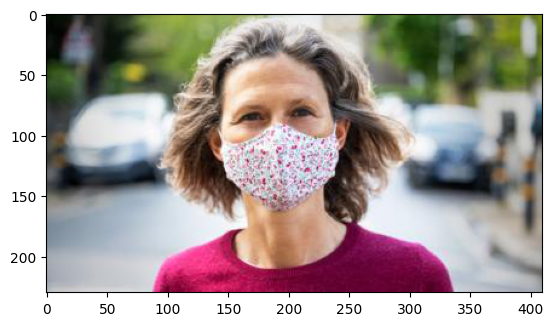

In [ ]:
# maske görüntüsü ile görüntüleme
img = mpimg.imread("/content/drive/MyDrive/with_mask/image_100.png")
imgplot = plt.imshow(img)
plt.show()

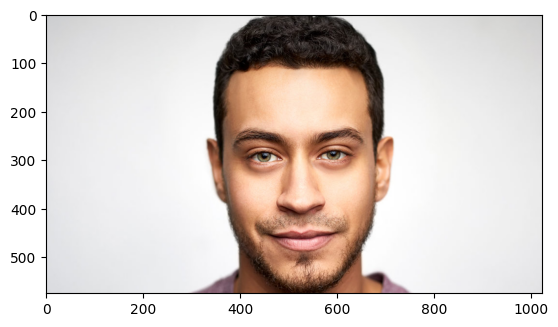

In [ ]:
# maskesiz görüntü ile görüntüleme
img = mpimg.imread("/content/drive/MyDrive/without_mask/image_17.png")
imgplot = plt.imshow(img)
plt.show()

Görüntü İşleme

   1.Görüntüleri Yeniden Boyutlandırma

   2.Görüntüleri numpy dizilerine dönüştürme

In [ ]:
# convert images to numpy arrays+

with_mask_path = "/content/drive/MyDrive/with_mask/"

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = "/content/drive/MyDrive/without_mask/"


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

440

array([[[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [245, 245, 245]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [245, 245, 245]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [245, 245, 245]],

       ...,

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [233, 233, 233]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [237, 237, 237]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [245, 244, 244],
        [235, 234, 232]]], dtype=uint8)
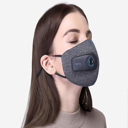

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(440, 128, 128, 3)
(440,)


In [ ]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(440, 128, 128, 3) (352, 128, 128, 3) (88, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [228, 229, 231],
        [228, 229, 232],
        [229, 230, 235]],

       [[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [228, 229, 231],
        [228, 229, 232],
        [229, 230, 235]],

       [[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [228, 229, 231],
        [228, 229, 232],
        [229, 230, 235]],

       ...,

       [[ 33,  33,  35],
        [ 33,  33,  35],
        [ 33,  33,  35],
        ...,
        [ 15,  15,  15],
        [  8,   8,   8],
        [ 11,  11,  11]],

       [[ 30,  30,  32],
        [ 31,  31,  33],
        [ 31,  31,  33],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  2,   2,   2]],

       [[ 29,  29,  31],
        [ 29,  29,  31],
        [ 29,  29,  31],
        ...,
        [  0,   0,   0],
        [  2,   2,   2],
        [  0,   0,   0]]], dtype=uint8)
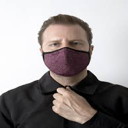

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        ...,
        [0.89411765, 0.89803922, 0.90588235],
        [0.89411765, 0.89803922, 0.90980392],
        [0.89803922, 0.90196078, 0.92156863]],

       [[0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        ...,
        [0.89411765, 0.89803922, 0.90588235],
        [0.89411765, 0.89803922, 0.90980392],
        [0.89803922, 0.90196078, 0.92156863]],

       [[0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        ...,
        [0.89411765, 0.89803922, 0.90588235],
        [0.89411765, 0.89803922, 0.90980392],
        [0.89803922, 0.90196078, 0.92156863]],

       ...,

       [[0.12941176, 0.12941176, 0.1372549 ],
        [0.12941176, 0.12941176, 0.1372549 ],
        [0.12941176, 0

Evrişimsel Sinir Ağları (CNN) Oluşturma

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 1.2224 - acc: 0.5696 - val_loss: 0.5949 - val_acc: 0.8611
Epoch 2/10
10/10 [==============================] - 7s 733ms/step - loss: 0.4992 - acc: 0.7816 - val_loss: 0.5084 - val_acc: 0.6667
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.3736 - acc: 0.8797 - val_loss: 0.3862 - val_acc: 0.8056
Epoch 4/10
10/10 [==============================] - 8s 727ms/step - loss: 0.2998 - acc: 0.8924 - val_loss: 0.3203 - val_acc: 0.8889
Epoch 5/10
10/10 [==============================] - 10s 995ms/step - loss: 0.2574 - acc: 0.9146 - val_loss: 0.3045 - val_acc: 0.8889
Epoch 6/10
10/10 [==============================] - 7s 720ms/step - loss: 0.2053 - acc: 0.9399 - val_loss: 0.2906 - val_acc: 0.8611
Epoch 7/10
10/10 [==============================] - 10s 982ms/step - loss: 0.1294 - acc: 0.9494 - val_loss: 0.4837 - val_acc: 0.8611
Epoch 8/10
10/10 [==============================] - 7s 730ms/step - loss: 0.14

Model Değerlendirme

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

3/3 [==============================] - 1s 168ms/step - loss: 0.4427 - acc: 0.9091
Test Accuracy = 0.9090909361839294


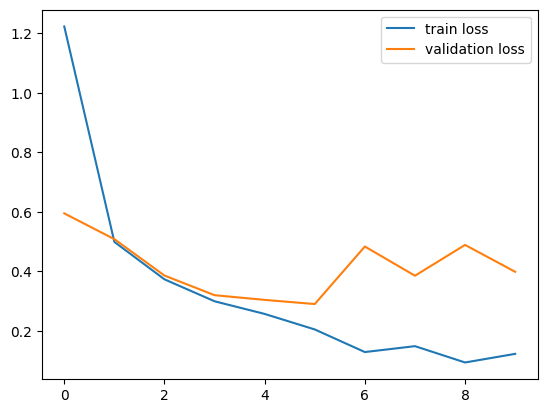

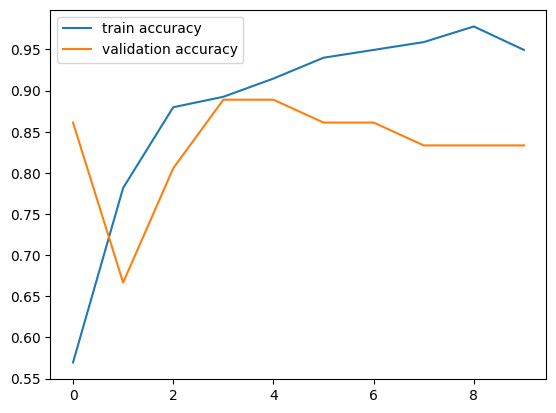

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Tahmine Dayalı Sistem

In [ ]:
from sklearn.metrics import confusion_matrix

# Test veri seti üzerinde tahmin yapma
Y_pred = model.predict(X_test_scaled)
# Tahminleri sınıflara dönüştürme
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Konfüzyon matrisini oluşturma
conf_matrix = confusion_matrix(Y_test, Y_pred_classes)

print("Konfüsyon Matrisi:")
print(conf_matrix)



3/3 [==============================] - 1s 169ms/step
Konfüsyon Matrisi:
[[44  3]
 [ 5 36]]


Path of the image to be predicted: /content/drive/MyDrive/mask.jpg


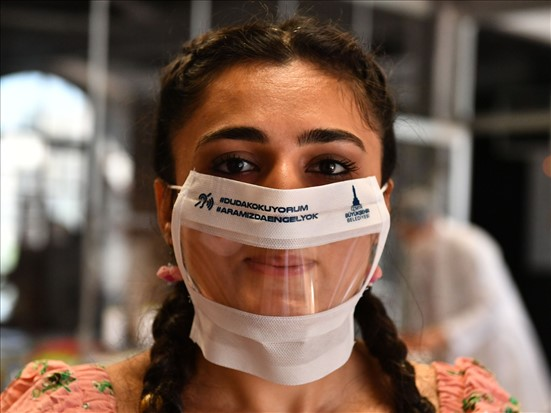

1/1 [==============================] - 0s 50ms/step
[[0.00429256 0.9999724 ]]
1
Görüntüdeki kişi maske takmıştır.


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Görüntüdeki kişi maske takmıştır.')

else:

  print('Görüntüdeki kişi maske takmamıştır.')